In [15]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from data_loader.load_data import ImagesLoader
from data_loader.image_descriptors import ImageDescriptors as desc

In [4]:
import warnings
warnings.filterwarnings('ignore')

# **CARREGANDO IMAGENS**

In [5]:
loader = ImagesLoader(train_images_path='../data/train/',
                      test_images_path='../data/test/')

data = loader.load_data(load_list=['features_hog'])

+ names_files loaded
+ names_paths loaded
+ names_characters loaded
+ names_encoded loaded
+ images_original loaded
+ images_filtered loaded
+ images_resized loaded
- images_lbp not in load list
- images_hu_moments not in load list
- images_gabor not in load list
- images_hog not in load list
- descriptor_lbp not in load list
- descriptor_hu_moments not in load list
- descriptor_gabor not in load list
- descriptor_hog not in load list


../data/train/bart001.bmp


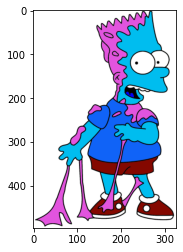

In [6]:
path = data['names_paths']['train'][0]

print(path)
img = cv2.imread(path)
plt.imshow(img);

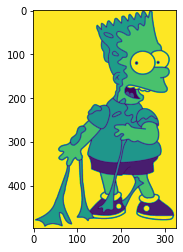

In [7]:
gray = desc.apply_filters(img)
plt.imshow(gray);

# **HSTOGRAMAS RGB**

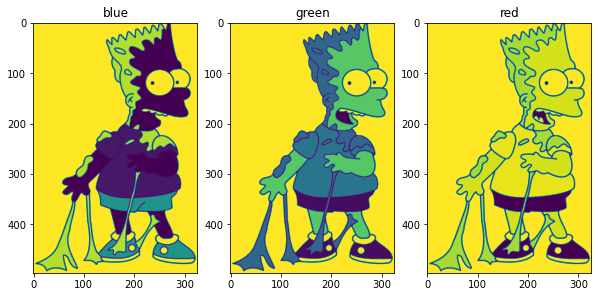

In [36]:
blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]

fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(blue);
ax[0].set_title('blue');

ax[1].imshow(green);
ax[1].set_title('green');

ax[2].imshow(red);
ax[2].set_title('red');

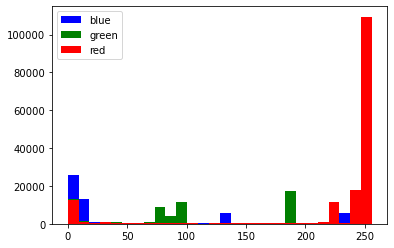

In [33]:
plt.hist(x=blue.ravel(), bins=28, range=[0,256], color='b', label='blue');
plt.hist(x=green.ravel(), bins=28, range=[0,256], color='g', label='green');
plt.hist(x=red.ravel(), bins=28, range=[0,256], color='r', label='red');
plt.legend();

# **HISTOGRAMAS HSV**

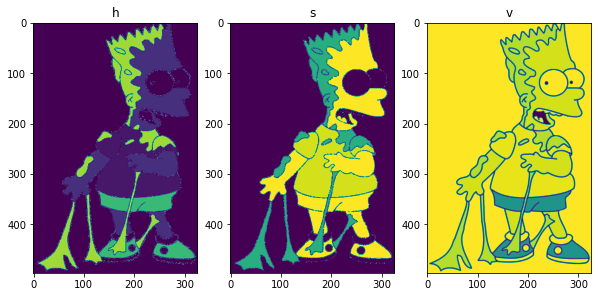

In [37]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(h);
ax[0].set_title('h');

ax[1].imshow(s);
ax[1].set_title('s');

ax[2].imshow(v);
ax[2].set_title('v');

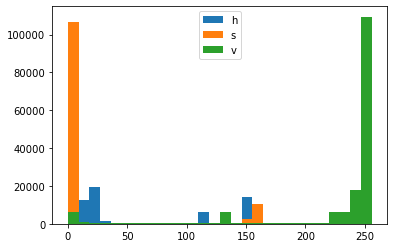

In [39]:
plt.hist(x=h.ravel(), bins=28, range=[0,256], label='h');
plt.hist(x=s.ravel(), bins=28, range=[0,256], label='s');
plt.hist(x=v.ravel(), bins=28, range=[0,256], label='v');
plt.legend();

# **LBP**

In [40]:
lbp_hist, lbp_img = desc.lbp(img)
lbp_hist.shape, lbp_img.shape

((10,), (497, 326))

In [44]:
lbp_hist

array([0.01164657, 0.0109553 , 0.0029317 , 0.01694832, 0.05061041,
       0.07094098, 0.0145042 , 0.04271642, 0.72806162, 0.05068447])

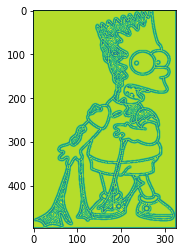

In [41]:
plt.imshow(lbp_img);

# **HU MOMENTS**

In [9]:
hu_moments, img_threshold = desc.hu_moments(img)
hu_moments.shape, img_threshold.shape

((7,), (497, 326))

In [10]:
hu_moments

array([ 3.01939249,  6.88735564, 11.27468714, 10.90765349, 22.39033211,
       14.48663445, 22.03793115])

# **GABOR**

In [18]:
gabor_filters, gabor_img = desc.gabor(img)
gabor_filters.shape, gabor_img.shape

((8, 31, 31), (497, 326))

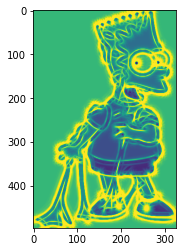

In [13]:
plt.imshow(gabor_img);

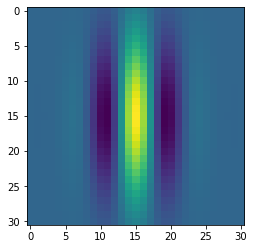

In [20]:
plt.imshow(gabor_filters[0]);

# **HOG**

In [14]:
hog_features, hog_img = desc.hog(img)
hog_features.shape, hog_img.shape

((85644,), (497, 326))

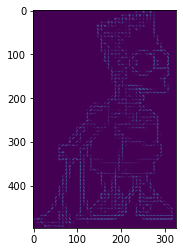

In [15]:
plt.imshow(hog_img);

# **EXIBINDO LADO A LADO**

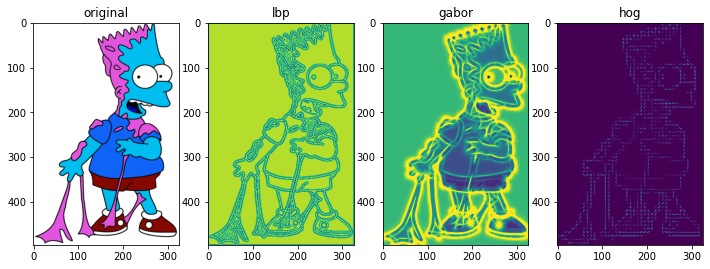

In [33]:
fig, ax = plt.subplots(1,4, figsize=(12,5))

ax[0].imshow(img);
ax[0].set_title('original');

ax[1].imshow(lbp_img);
ax[1].set_title('lbp');

ax[2].imshow(gabor_img);
ax[2].set_title('gabor');

ax[3].imshow(hog_img);
ax[3].set_title('hog');